**K-means Clustering**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
#Unsupervised learning...
# Hicbir bilgiyi machine learning algoritmasina ogretmeyecegiz, supervised etmeyecegiz.
# Verileri verecegiz o bizim icin gruplama yapacak.

In [2]:
df=pd.read_csv("Avm_Musterileri.csv")
df.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


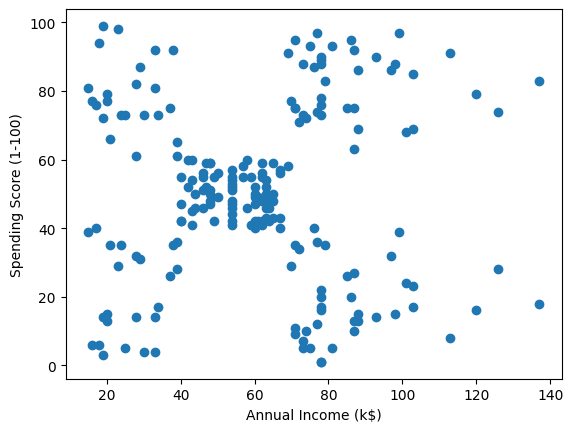

In [4]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# veri setini gozlemlemek istiyorum...

In [6]:
# Sutun isimleri cok uzun kisaltmak istiyorum
df.rename(columns={'Annual Income (k$)':'income'}, inplace=True)
df.rename(columns={'Spending Score (1-100)':'score'}, inplace=True)

# sutunun once eski halini yazip sonra yeni halini yaziyosunuz,
# inplace True dediginizde orjinal df degeri degisecektir

In [7]:
# Unutmayin modelinize verileri basmadan once mutlaka verilerinizi normalize etmelisiniz.
# Bu noralizasyon icin sklearn kutuphanesinden MinMaxScaler kullanicam.

scaler=MinMaxScaler()

scaler.fit(df[['income']])
df['income'] = scaler.transform(df[['income']])

scaler.fit(df[['score']])
df['score'] = scaler.transform(df[['score']])

df.head()


,CustomerID,income,score
0,1,0.000000,0.387755
1,2,0.000000,0.816327
2,3,0.008197,0.051020
3,4,0.008197,0.775510
4,5,0.016393,0.397959


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

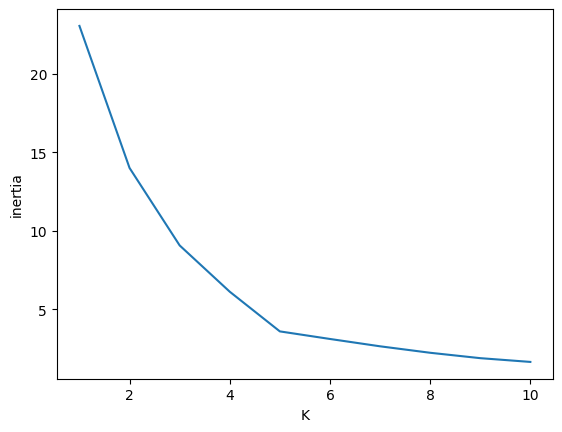

In [11]:
# k degerini belirleyelim (elbow yontemi kullanarak)
k_range=range(1,11)
list_dist=[]

for k in k_range:
  kmeans_model = KMeans(n_clusters=k)
  kmeans_model.fit(df[['income','score']])
  list_dist.append(kmeans_model.inertia_)

plt.xlabel('K')
plt.ylabel('inertia')
plt.plot(k_range,list_dist)
plt.show()

In [12]:
# En iyi k degeri 5
kmeans_model = KMeans(n_clusters=5)
y_predicted = kmeans_model.fit_predict(df[['income','score']])
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

In [13]:
df['cluster'] = y_predicted
df.head()

,CustomerID,income,score,cluster
0,1,0.000000,0.387755,3
1,2,0.000000,0.816327,4
2,3,0.008197,0.051020,3
3,4,0.008197,0.775510,4
4,5,0.016393,0.397959,3


In [14]:
#Centroidleri gormek
kmeans_model.cluster_centers_

array([[0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.33029751, 0.49508692],
       [0.09265859, 0.20319432],
       [0.08792846, 0.79962894]])

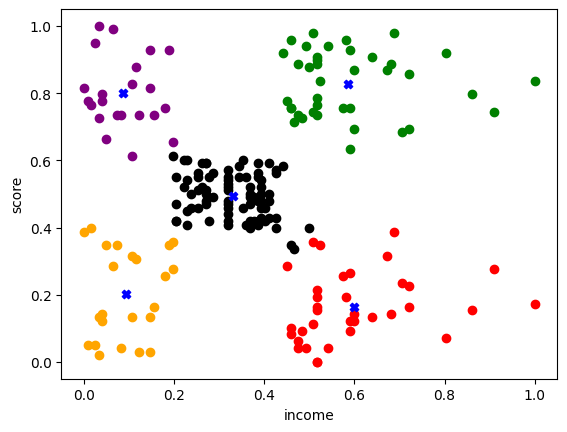

In [18]:
df0 = df[df.cluster==0]
df1 = df[df.cluster==1]
df2 = df[df.cluster==2]
df3 = df[df.cluster==3]
df4 = df[df.cluster==4]

plt.xlabel('income')
plt.ylabel('score')
plt.scatter(df0['income'],df0['score'],color='green')
plt.scatter(df1['income'],df1['score'],color='red')
plt.scatter(df2['income'],df2['score'],color='black')
plt.scatter(df3['income'],df3['score'],color='orange')
plt.scatter(df4['income'],df4['score'],color='purple')

# kmeans_model.cluster_centers_ numpy 2 boyutlu array oldugu icin x ve y sutunlarini kmeans_model.cluster_centers_[:,0]
# ve kmeans_model.cluster_centers_[:,1] seklinde scatterplot icin aliyoruz:

plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], color='blue', marker='X', label='centroid')
plt.show()